In [172]:
#This code uses data from the "Picarro G2301" instrument (in this code: 'PICC') and the "Datalogger STRATO2" (wider screen, in this code: 'TKDL' ['ThicK screen DataLogger']).
    #Creates a 2D line plot of gas level verus time (PICC only)
    #Rescales PICC data to match the real-time TKDL data
    #Creates a 2D scatter plot of latitude vs longitude with colours representing [PICC parameter] concentration 
    
#All you need to imput is: 
    # filename (PICC, TKDL)
    # location of where to save the output
    # UTC start time (PICC, TKDL)
    # date (TKDL)
    
#please note, the boxes need to be run in order

#Written by Merrilyn McKee for the Centre for Atmospheric Chemistry (University of Wollongong)
#January 2018

In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mpl_toolkits.mplot3d import Axes3D
from scipy import interpolate
import pyproj
import LatLon


######################## USER INPUT REQUIRED ########################

#field trip information
location = 'Botanical Gardens'
date_obt = '19-12-2017' #put in 'dd-mm-yyyy' format
aircorereplicate = '1'

#files to use
TKDL_ogfile = 'C:\Users\pokem\Google Drive\Applying for stuff\Wollongong Documents\Organised data\Botanical Gardens\F_4_mod.log'
PICC_ogfile = 'C:\Users\pokem\Google Drive\Applying for stuff\Wollongong Documents\Organised data\Botanical Gardens\CFADS2369-20171219-044443Z-DataLog_User.dat'
wheretosave = 'C:\Users\pokem\Google Drive\Applying for stuff\Wollongong Documents\Practise data\Complete code\output\.folder' #put \.folder after the folder for this to work

#sometimes the PICC data is spread over two files
second_PICC_file = 'Y' #choose whether there is a second PICC file, if not, comment out the file below
PICC_ogfile2 = 'C:\Users\pokem\Google Drive\Applying for stuff\Wollongong Documents\Organised data\Botanical Gardens\CFADS2369-20171219-054454Z-DataLog_User.dat'

#starting and ending times in UCT for the required data within the file
TKDL_start = '2017-12-19 05:05:00' 
TKDL_end = '2017-12-19 05:17:00' 

PICC_start = '2017-12-19 05:46:40'
PICC_end = '2017-12-19 05:59:40'

######################## END USER INPUT REQUIRED ########################

#imports the file, makes datetime the index and removes the space in column headings
TKDL_df = pd.read_csv(TKDL_ogfile, delimiter=r';', header = 1, engine = 'python', parse_dates=[['UTC','Date']])
TKDL_df.columns = [c.replace(' ', '_') for c in TKDL_df.columns]
TKDL_df = TKDL_df[TKDL_df.RMC_Valid != 'N']
TKDL_df['UTC_Date'] = pd.to_datetime(TKDL_df['UTC_Date'], format = '%H:%M:%S %d.%m.%Y')
TKDL_df.index = TKDL_df['UTC_Date']

PICC_data = pd.read_csv(PICC_ogfile, delimiter=r'\s+', parse_dates=[['TIME','DATE']])
PICC_data.index = PICC_data['TIME_DATE']

if second_PICC_file == 'Y':
    PICC_data2 = pd.read_csv(PICC_ogfile2, delimiter=r'\s+', parse_dates=[['TIME','DATE']])
    PICC_data2.index = PICC_data2['TIME_DATE']
    PICC_data = pd.concat([PICC_data,PICC_data2])


#fixing the TKDL_GPS format
TKDL_df = TKDL_df.reset_index(drop = True) #need to remove datetime as the index for this to work

TKDL_df['TKDL_lat_mod'] = np.nan
TKDL_df['TKDL_lon_mod'] = np.nan

for i in range(len(TKDL_df['RMC_Valid'])):
    TKDL_df.loc[i,'TKDL_lat_mod'] = LatLon.string2geocoord(TKDL_df.Latitude[i],LatLon.Latitude,'d% %m% %H')
    TKDL_df.loc[i,'TKDL_lon_mod'] = LatLon.string2geocoord(TKDL_df.Longitude[i],LatLon.Longitude,'d% %m% %H')

TKDL_df.index = TKDL_df['UTC_Date'] #setting index to datetime again

#data for required parameters
PICC_CO2 = PICC_data['CO2']
PICC_CO2_dry = PICC_data['CO2_dry']
PICC_CH4 = PICC_data['CH4']
PICC_CH4_dry = PICC_data['CH4_dry']
PICC_H2O = PICC_data['H2O']

PICC_allydata = [PICC_CO2,PICC_CO2_dry,PICC_CH4,PICC_CH4_dry,PICC_H2O]
PICC_allydatanames = ['CO2','CO2_dry','CH4','CH4_dry','H2O']

#convert req times into datetime
TKDL_start_time = datetime.datetime.strptime(TKDL_start,'%Y-%m-%d %H:%M:%S')
TKDL_end_time = datetime.datetime.strptime(TKDL_end,'%Y-%m-%d %H:%M:%S')
PICC_start_time = datetime.datetime.strptime(PICC_start,'%Y-%m-%d %H:%M:%S')
PICC_end_time = datetime.datetime.strptime(PICC_end,'%Y-%m-%d %H:%M:%S')

#general for naming
filepart = wheretosave.split('.')[0]
filenamebeg = filepart + location + '_' + date_obt + '_rep' + aircorereplicate + '_TKDL_'
PICC_start_str = str(PICC_start_time.hour)+'h'+str(PICC_start_time.minute)+'m'+str(PICC_start_time.second)+'s'
PICC_end_str = str(PICC_end_time.hour)+'h'+str(PICC_end_time.minute)+'m'+str(PICC_end_time.second)+'s'


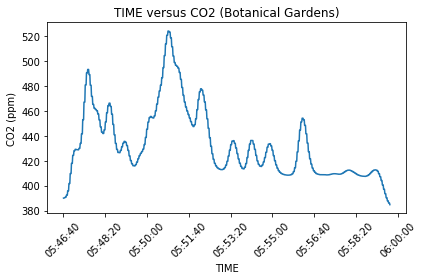

C:\Users\pokem\Google Drive\Applying for stuff\Wollongong Documents\Practise data\Complete code\output\Botanical Gardens_19-12-2017_rep1_TKDL_TIME_vs_CO2_graph_5h46m40sto5h59m40s


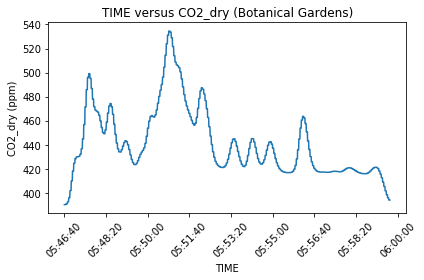

C:\Users\pokem\Google Drive\Applying for stuff\Wollongong Documents\Practise data\Complete code\output\Botanical Gardens_19-12-2017_rep1_TKDL_TIME_vs_CO2_dry_graph_5h46m40sto5h59m40s


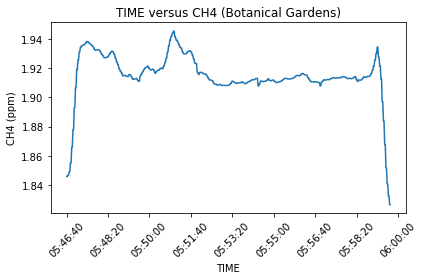

C:\Users\pokem\Google Drive\Applying for stuff\Wollongong Documents\Practise data\Complete code\output\Botanical Gardens_19-12-2017_rep1_TKDL_TIME_vs_CH4_graph_5h46m40sto5h59m40s


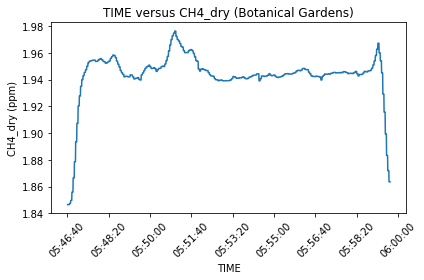

C:\Users\pokem\Google Drive\Applying for stuff\Wollongong Documents\Practise data\Complete code\output\Botanical Gardens_19-12-2017_rep1_TKDL_TIME_vs_CH4_dry_graph_5h46m40sto5h59m40s


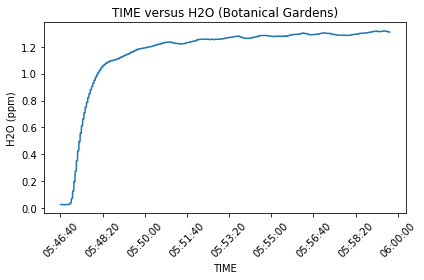

C:\Users\pokem\Google Drive\Applying for stuff\Wollongong Documents\Practise data\Complete code\output\Botanical Gardens_19-12-2017_rep1_TKDL_TIME_vs_H2O_graph_5h46m40sto5h59m40s


In [316]:
#plotting 2D PICC graphs of [parameter] vs Time    
i = 0
while i <len(PICC_allydata):
    
    x=PICC_data.TIME_DATE.dt.time
    y = PICC_allydata[i]
    xaxstr = 'TIME'
    y1axstr = PICC_allydatanames[i] + ' (ppm)'
    titl = xaxstr + ' versus ' + PICC_allydatanames[i] + ' (' + location + ')'

    fig1=plt.plot(x[PICC_start:PICC_end],y[PICC_start:PICC_end])
    plt.title(titl)
    plt.xlabel(xaxstr)
    plt.ylabel(y1axstr)
    plt.xticks(rotation='45')
    plt.tight_layout()

    #saving the graphs as ready-named files
    filename = filenamebeg + xaxstr +'_vs_' + PICC_allydatanames[i] + '_graph'+'_'+PICC_start_str+'to'+PICC_end_str
    plt.gcf()
#     plt.savefig(filename+'.png')
    plt.show()
    
    print filename
    
    i = i + 1

In [317]:
#determining the number of rows, time duration and rows per time for required data
TKDL_specnumrow = TKDL_df.TKDL_lat_mod[TKDL_start_time: TKDL_end_time].count()
PICC_specnumrow = PICC_CO2[PICC_start_time : PICC_end_time].count()
TKDL_duration = (TKDL_end_time - TKDL_start_time).seconds
PICC_duration = (PICC_end_time - PICC_start_time).seconds
TKDL_dataden = 1.*TKDL_specnumrow/TKDL_duration
PICC_dataden = 1.*PICC_specnumrow/PICC_duration
reqratio = 1.*TKDL_duration/PICC_duration

print 'TKDL', 'number of rows =',(TKDL_specnumrow), '; number of seconds =',(TKDL_duration), '; rows/second',(TKDL_dataden)
print 'PICC', 'number of rows =',(PICC_specnumrow), '; number of seconds =',(PICC_duration), '; rows/second',(PICC_dataden)
print 'TKDL', type(TKDL_specnumrow), type(TKDL_duration), type(TKDL_dataden)
print 'PICC', type(PICC_specnumrow), type(PICC_duration), type(PICC_dataden)

TKDL number of rows = 354 ; number of seconds = 720 ; rows/second 0.491666666667
PICC number of rows = 781 ; number of seconds = 780 ; rows/second 1.00128205128
TKDL <type 'numpy.int32'> <type 'int'> <type 'float'>
PICC <type 'numpy.int32'> <type 'int'> <type 'float'>


In [323]:
from datetime import datetime, timedelta
from mpl_toolkits.mplot3d import Axes3D

TKDL_newdf = TKDL_df[TKDL_start_time:TKDL_end_time]
TKDL_newdf.loc[:,'TKDL_timediff'] = np.nan
TKDL_newdf.loc[:,'TKDL_timediff'] = TKDL_newdf.loc[:,'UTC_Date'] - TKDL_start_time

TKDL_newdf.index = TKDL_newdf.TKDL_timediff
TKDL_newdf = TKDL_newdf[~TKDL_newdf.index.duplicated(keep='first')]

PICC_newdf = PICC_data[PICC_start_time:PICC_end_time]
PICC_newdf.loc[:,'PICC_timediff'] = np.nan
PICC_newdf.loc[:,'PICC_timediff'] = PICC_newdf.loc[:,'TIME_DATE'] - PICC_start_time

PICC_newdf.loc[:,'tscaled'] = PICC_newdf.loc[:,'PICC_timediff']*reqratio
PICC_newdf.index = PICC_newdf.tscaled
PICC_newdf = PICC_newdf[~PICC_newdf.index.duplicated(keep='first')]


newdf = pd.concat([TKDL_newdf,PICC_newdf], axis = 1)
newdf= pd.DataFrame(newdf).interpolate(method='index')
newdf = newdf[~newdf['TKDL_lat_mod'].isin([np.nan])]

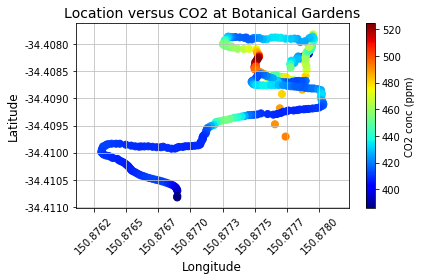

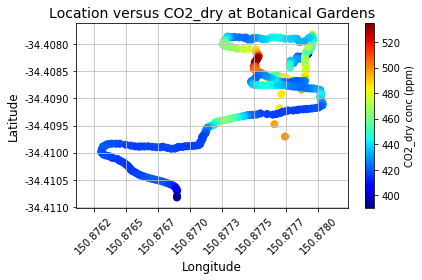

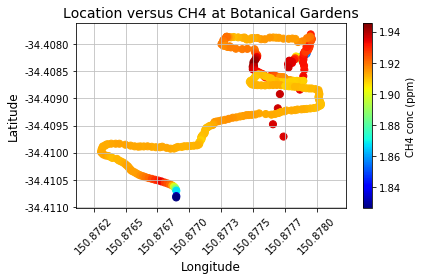

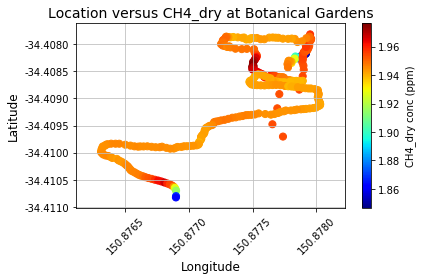

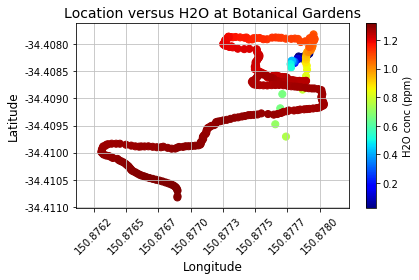

In [314]:
import matplotlib
from matplotlib  import cm
from matplotlib.ticker import FormatStrFormatter

#maximum and minimum parameters, used to make scalebar and axes
latmax = round(max(newdf.TKDL_lat_mod),5)
latmin = round(min(newdf.TKDL_lat_mod),5)
lonmax = round(max(newdf.TKDL_lon_mod),5)
lonmin = round(min(newdf.TKDL_lon_mod),5)

#making plotting easier
newdf_allydata = [newdf.CO2, newdf.CO2_dry, newdf.CH4, newdf.CH4_dry, newdf.H2O]
newdf_allydatanames = ['CO2','CO2_dry','CH4','CH4_dry','H2O']
newdf_allmax = ['CO2max', 'CO2_drymax', 'CH4max', 'CH4_drymax', 'H2Omax']
newdf_allmin = ['CO2min', 'CO2_drymin', 'CH4min', 'CH4_drymin', 'H2Omin']

#plotting 2D PICC graphs of lat vs lon with colourbar of [PICC parameter]    
i = 0
while i <len(PICC_allydata):
        
    y = newdf.TKDL_lat_mod
    x = newdf.TKDL_lon_mod
    z = newdf_allydata[i]
    yaxstr3d = 'Latitude'
    xaxstr3d = 'Longitude'
    zxstr3d = newdf_allydatanames[i] + ' (ppm)'
    titl = 'Location' + ' versus ' + newdf_allydatanames[i] + ' at '+ location
    cb_titl = newdf_allydatanames[i] + ' conc (ppm)'

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.set_title(titl,fontsize=14)
    ax.set_ylabel('Latitude',fontsize=12)
    ax.set_xlabel('Longitude',fontsize=12)
    ax.grid(True,linestyle='-',color='0.75')
    ax.set_ylim([latmin-0.0002,latmax+0.0002])
    ax.set_xlim([lonmin-0.0002,lonmax+0.0002])
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
    smhh = ax.scatter(x,y,c=z,s = 50, marker = 'o', cmap = cm.jet )
    plt.xticks(rotation='45')
    cb = plt.colorbar(smhh)
    cb.set_label(cb_titl)
    plt.tight_layout()
 
    #saving the graphs as ready-named files
    filename = filenamebeg + 'LatLon' +'_vs_' + newdf_allydatanames[i] + '_graph'+'_'+PICC_start_str+'to'+PICC_end_str
    plt.gcf()
    plt.savefig(filename+'.png')
    plt.show()
    
    i = i + 1
    
plt.close('all')